In [1]:
import pandas as pd
import numpy as np
import os

#for multicollinearity issues
from statsmodels.stats.outliers_influence import variance_inflation_factor

#for correlation heat max
import seaborn as sns
from matplotlib import pyplot as plt

#for ttest
from scipy import stats 

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [3]:
file_location =  '/Users/chewy2.0/Capstone/data' ##change as necessary
os.chdir(file_location)

In [4]:
train = pd.read_csv('Fixed_log_standardized_train.csv', dtype = {'GEOID':'str'}, low_memory = False)
test = pd.read_csv('Fixed_log_stadardaized_test.csv', dtype = {'GEOID':'str'}, low_memory = False)

In [5]:
train_raw = pd.read_csv('Fixed_log_RAW_train.csv', dtype = {'GEOID':'str'}, low_memory = False)
test_raw = pd.read_csv('Fixed_log_RAW_test.csv', dtype = {'GEOID':'str'}, low_memory = False)

In [6]:
train.head(5)

,app_num,app_yr,GEOID,patent_num,assignee,team_size,men_inventors,women_inventors,women_involved,Over25_Less9Grade,Over25_SomeHS,Over25_HSGrad,Over25_SomeCollege,Over25_Assosc,Over25_Bach,Over25_Grad,bea_region,Agriculture_Forestry_Fishing_Hunting,Mining_Quarrying_and_Oil_Gas_Extraction,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate_Rental_Leasing,Professional_Scientific_and_Technical_Services,Management_of_Companies_Enterprises,Administrative_Support_Waste_Management_Remediation_Services,Educational_Services,Health_Care_Social_Assistance,Arts_Entertainment_and_Recreation,Accommodation_Food_Services,Other_Services_except_Public_Administration,qp1,ap,est,Agriculture_Forestry_Fishing_Hunting_base,Mining_Quarrying_and_Oil_Gas_Extraction_base,Utilities_base,Construction_base,Manufacturing_base,Wholesale_Trade_base,Retail_Trade_base,Transportation_Warehousing_base,Information_base,Finance_Insurance_base,Real_Estate_Rental_Leasing_base,Professional_Scientific_and_Technical_Services_base,Management_of_Companies_Enterprises_base,Administrative_Support_Waste_Management_Remediation_Services_base,Educational_Services_base,Health_Care_Social_Assistance_base,Arts_Entertainment_and_Recreation_base,Accommodation_Food_Services_base,Other_Services_except_Public_Administration_base,GDP,pop_gt_16,pop_gt_16_lf,pop_gt_16_lf_c,Pop_Est,Earnings_by_place_of_work,Employee_and_self-employed_contributions_for_government_social_insurance,Employer_contributions_for_employee_pension_and_insurance_funds,Employer_contributions_for_government_social_insurance,Equals_Net_earnings_by_place_of_residence,Farm_income,Farm_proprietors_income,Less_Contributions_for_government_social_insurance,Nonfarm_personal_income,Nonfarm_proprietors_income,Per_capita_personal_income_dollars,Personal_income_thousands_of_dollars,Plus_Adjustment_for_residence,Plus_Dividends_interest_and_rent,Plus_Personal_current_transfer_receipts,Population_persons,Proprietors_employment,Proprietors_income,Supplements_to_wages_and_salaries,Total_employment,Wage_and_salary_employment,Wages_and_salaries,Population_Estimate,Applications,Award_Amount,GDP_by_labor_force,ap_by_est,est_by_pop_gt_16_lf,apps_by_pop_gt_16_lf,Wages_by_pop_gt_16_lf,Award_by_pop_gt_16_lf,r1_involved,r2_involved,special_focus_involved,any_R_uni_involved
0,15996554,2018,27123,0,1,2.407590,3.044075,-0.478617,0,-0.131290,-0.976825,-0.179164,0.020462,0.986491,0.381272,0.013624,Plains,-0.166656,-0.200973,0.077057,-0.731294,-0.036333,-0.263086,-0.670700,-0.614346,-0.379332,0.351471,-0.559179,-1.093762,2.045858,-0.891440,1.355295,1.488945,0.392748,-0.700604,0.812917,-0.577583,-0.636811,-0.633170,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,1,-0.660606,-0.588260,-0.589613,-0.587665,-0.584881,-0.641048,-0.592444,-0.584770,-0.619140,-0.754231,-0.563759,-0.472570,-0.607387,-0.710956,-0.667516,-0.391258,-0.711481,0.076055,-0.706299,-0.448016,-0.590814,-0.623514,-0.670221,-0.597988,-0.594832,-0.581424,-0.629094,-0.590502,-0.574513,-0.360891,-0.158144,0.381549,-0.517646,-0.030884,0.090189,-0.034310,0,0,0,0
1,14313068,2014,32003,1,1,0.007154,0.286400,-0.478617,0,0.278969,1.158143,1.113620,1.970703,0.195557,-1.636573,-1.523244,Far West,-0.200336,-0.147260,-0.741493,0.610168,-1.116384,-1.436800,0.701921,0.547371,-0.940760,-0.712313,1.864486,-0.981077,-0.751802,0.817593,-1.056224,-1.210925,0.653613,8.260095,-1.277653,-0.385812,-0.387686,-0.006506,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,-0.277545,0.240401,0.231850,0.227999,0.250969,-0.301352,-0.248882,-0.128007,-0.218907,-0.230931,-0.558723,-0.502908,-0.235986,-0.152875,-0.357233,-0.971473,-0.153593,0.365217,-0.086669,0.108401,0.261164,0.085536,-0.360170,-0.157153,0.072901,0.068367,-0.311084,0.260562,0.924194,-0.157605,-0.775163,-0.726123,-0.973066,1.637425,-0.785687,-0.195088,0,0,0,0
2,12789985,2010,06085,1,1,-0.472933,-0.265134,-0.478617,0,0.353561,-0.113753,-0.977180,-0.696538,0.134716,0.322500,0.988626,Far West,-0.147

In [7]:
train_raw.head(5)

,app_num,app_yr,GEOID,patent_num,assignee,team_size,men_inventors,women_inventors,women_involved,Over25_Less9Grade,Over25_SomeHS,Over25_HSGrad,Over25_SomeCollege,Over25_Assosc,Over25_Bach,Over25_Grad,bea_region,Agriculture_Forestry_Fishing_Hunting,Mining_Quarrying_and_Oil_Gas_Extraction,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate_Rental_Leasing,Professional_Scientific_and_Technical_Services,Management_of_Companies_Enterprises,Administrative_Support_Waste_Management_Remediation_Services,Educational_Services,Health_Care_Social_Assistance,Arts_Entertainment_and_Recreation,Accommodation_Food_Services,Other_Services_except_Public_Administration,qp1,ap,est,Agriculture_Forestry_Fishing_Hunting_base,Mining_Quarrying_and_Oil_Gas_Extraction_base,Utilities_base,Construction_base,Manufacturing_base,Wholesale_Trade_base,Retail_Trade_base,Transportation_Warehousing_base,Information_base,Finance_Insurance_base,Real_Estate_Rental_Leasing_base,Professional_Scientific_and_Technical_Services_base,Management_of_Companies_Enterprises_base,Administrative_Support_Waste_Management_Remediation_Services_base,Educational_Services_base,Health_Care_Social_Assistance_base,Arts_Entertainment_and_Recreation_base,Accommodation_Food_Services_base,Other_Services_except_Public_Administration_base,GDP,pop_gt_16,pop_gt_16_lf,pop_gt_16_lf_c,Pop_Est,Earnings_by_place_of_work,Employee_and_self-employed_contributions_for_government_social_insurance,Employer_contributions_for_employee_pension_and_insurance_funds,Employer_contributions_for_government_social_insurance,Equals_Net_earnings_by_place_of_residence,Farm_income,Farm_proprietors_income,Less_Contributions_for_government_social_insurance,Nonfarm_personal_income,Nonfarm_proprietors_income,Per_capita_personal_income_dollars,Personal_income_thousands_of_dollars,Plus_Adjustment_for_residence,Plus_Dividends_interest_and_rent,Plus_Personal_current_transfer_receipts,Population_persons,Proprietors_employment,Proprietors_income,Supplements_to_wages_and_salaries,Total_employment,Wage_and_salary_employment,Wages_and_salaries,Population_Estimate,Applications,Award_Amount,GDP_by_labor_force,ap_by_est,est_by_pop_gt_16_lf,apps_by_pop_gt_16_lf,Wages_by_pop_gt_16_lf,Award_by_pop_gt_16_lf,r1_involved,r2_involved,special_focus_involved,any_R_uni_involved
0,15996554,2018,27123,0,1,8,8,0,0,5.4,4.5,20.9,18.8,8.5,25.1,16.9,Plains,0.052593,0.016376,0.473959,0.705567,0.849779,1.052828,0.735121,0.514996,1.162285,1.235977,0.861465,0.669426,3.248896,0.593679,2.329525,1.316294,1.229883,0.741849,1.200786,4960356,18058479,13514,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,1,43236637,428170,295672,295458,541493,28896222,1736892,3212453,1593711,17918622,756,-120,3330603,29490648,1582025,53728,29491404,-7646997,6236585,5336197,548900,63319,1581905,4806164,421804,358485,22508153,548872,5621,8057413.0,146.231760,1336.279340,0.045706,0.019011,76.125413,27.251187,0,0,0,0
1,14313068,2014,32003,1,1,3,3,0,0,6.5,9.2,29.0,25.6,7.2,14.8,7.6,Far West,0.000000,0.085170,0.000000,1.152433,0.251210,0.527340,1.033924,1.148191,0.526230,0.631058,1.728676,0.739045,0.815034,0.949304,0.326964,0.614184,1.346087,3.118210,0.620715,7622623,30789822,42031,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,96952928,1570602,1035500,1027940,2003613,58098513,3291406,7121058,3158288,51285468,1430,-2481,6449694,83500673,5632625,40655,83502103,-363351,18686140,13530495,2053929,255270,5630144,10279346,1168811,913541,42189023,2053134,33655,18587923.0,93.629095,732.550308,0.040590,0.032501,40.742659,17.950674,0,0,0,0
2,12789985,2010,06085,1,1,2,2,0,0,6.7,6.4,15.9,16.3,7.1,24.8,22.8,Far West,0.083012,0.028184,0.375189,0.835620,1.089962,2.043888,0.699264,0.321081,2.711134,0.544007,0.924028,2.094245,1.641249,0.807682,1.631025,0.659474,0.824165,0.747067,0.677596,17028097,72563627,44120,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0,169334468,1363338,915937,915333,1739396,102539943,5857247,8933994,4584245,79004316,165598,81127,1

In [8]:
test.head(5)

,app_num,app_yr,GEOID,patent_num,assignee,team_size,men_inventors,women_inventors,women_involved,Over25_Less9Grade,Over25_SomeHS,Over25_HSGrad,Over25_SomeCollege,Over25_Assosc,Over25_Bach,Over25_Grad,bea_region,Agriculture_Forestry_Fishing_Hunting,Mining_Quarrying_and_Oil_Gas_Extraction,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate_Rental_Leasing,Professional_Scientific_and_Technical_Services,Management_of_Companies_Enterprises,Administrative_Support_Waste_Management_Remediation_Services,Educational_Services,Health_Care_Social_Assistance,Arts_Entertainment_and_Recreation,Accommodation_Food_Services,Other_Services_except_Public_Administration,qp1,ap,est,Agriculture_Forestry_Fishing_Hunting_base,Mining_Quarrying_and_Oil_Gas_Extraction_base,Utilities_base,Construction_base,Manufacturing_base,Wholesale_Trade_base,Retail_Trade_base,Transportation_Warehousing_base,Information_base,Finance_Insurance_base,Real_Estate_Rental_Leasing_base,Professional_Scientific_and_Technical_Services_base,Management_of_Companies_Enterprises_base,Administrative_Support_Waste_Management_Remediation_Services_base,Educational_Services_base,Health_Care_Social_Assistance_base,Arts_Entertainment_and_Recreation_base,Accommodation_Food_Services_base,Other_Services_except_Public_Administration_base,GDP,pop_gt_16,pop_gt_16_lf,pop_gt_16_lf_c,Pop_Est,Earnings_by_place_of_work,Employee_and_self-employed_contributions_for_government_social_insurance,Employer_contributions_for_employee_pension_and_insurance_funds,Employer_contributions_for_government_social_insurance,Equals_Net_earnings_by_place_of_residence,Farm_income,Farm_proprietors_income,Less_Contributions_for_government_social_insurance,Nonfarm_personal_income,Nonfarm_proprietors_income,Per_capita_personal_income_dollars,Personal_income_thousands_of_dollars,Plus_Adjustment_for_residence,Plus_Dividends_interest_and_rent,Plus_Personal_current_transfer_receipts,Population_persons,Proprietors_employment,Proprietors_income,Supplements_to_wages_and_salaries,Total_employment,Wage_and_salary_employment,Wages_and_salaries,Population_Estimate,Applications,Award_Amount,GDP_by_labor_force,ap_by_est,est_by_pop_gt_16_lf,apps_by_pop_gt_16_lf,Wages_by_pop_gt_16_lf,Award_by_pop_gt_16_lf,r1_involved,r2_involved,special_focus_involved,any_R_uni_involved
0,15660150,2017,36093,1,1,0.007154,0.286400,-0.478617,0,-0.839919,-0.159178,1.193422,-0.467098,3.602657,-1.146805,-0.548242,Mideast,-0.190981,-0.213759,-0.741493,-0.496243,-0.063508,-1.869828,0.845376,0.143861,-0.761875,-0.504845,-1.354813,-0.422484,2.265985,-2.061146,0.268096,1.932208,3.061512,-0.525701,-0.518829,-0.886564,-0.938043,-0.863294,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,-0.908180,-0.807843,-0.830310,-0.828953,-0.805691,-0.917792,-0.911774,-0.878628,-0.949528,-0.961566,-0.572247,-0.482516,-0.933221,-0.938104,-0.764209,-0.622270,-0.938560,0.387062,-0.959061,-0.698264,-0.813957,-0.802211,-0.766957,-0.904552,-0.898617,-0.922648,-0.931600,-0.813506,-0.825884,-0.436011,-0.606775,-0.463223,-1.153995,-0.941391,-0.606083,0.407449,0,0,0,0
1,13949033,2013,06113,1,1,-0.953021,-0.816669,-0.478617,0,1.062190,0.613045,-0.498371,0.335942,-0.352012,-0.715809,0.327608,Far West,1.495118,0.014714,-0.741493,0.342366,0.462108,1.579168,0.252385,3.271937,-0.933076,-0.897932,1.477274,-0.869048,-0.675695,-1.387227,-0.962625,-0.894674,-0.072217,1.747075,-0.035862,-0.895288,-0.940632,-0.844922,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,-0.887100,-0.780998,-0.804692,-0.803572,-0.778794,-0.884455,-0.894702,-0.788672,-0.941320,-0.937509,1.719785,2.319271,-0.920202,-0.923548,-0.728623,-0.791368,-0.920840,0.338527,-0.933291,-0.721091,-0.784774,-0.778038,-0.714677,-0.839967,-0.859865,-0.879556,-0.909279,-0.784323,-0.824868,-0.484465,-0.553330,-0.872231,-1.200789,-1.244295,-0.539577,-0.224630,0,0,0,0
2,14230185,2014,36119,1,2,1.447415,1.389470,-0.478617,0,0.502746,-0.204603,-0.115323,-1.155419,-1.021264,0.009048,0.922525,

In [9]:
test_raw.head(5)

,app_num,app_yr,GEOID,patent_num,assignee,team_size,men_inventors,women_inventors,women_involved,Over25_Less9Grade,Over25_SomeHS,Over25_HSGrad,Over25_SomeCollege,Over25_Assosc,Over25_Bach,Over25_Grad,bea_region,Agriculture_Forestry_Fishing_Hunting,Mining_Quarrying_and_Oil_Gas_Extraction,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate_Rental_Leasing,Professional_Scientific_and_Technical_Services,Management_of_Companies_Enterprises,Administrative_Support_Waste_Management_Remediation_Services,Educational_Services,Health_Care_Social_Assistance,Arts_Entertainment_and_Recreation,Accommodation_Food_Services,Other_Services_except_Public_Administration,qp1,ap,est,Agriculture_Forestry_Fishing_Hunting_base,Mining_Quarrying_and_Oil_Gas_Extraction_base,Utilities_base,Construction_base,Manufacturing_base,Wholesale_Trade_base,Retail_Trade_base,Transportation_Warehousing_base,Information_base,Finance_Insurance_base,Real_Estate_Rental_Leasing_base,Professional_Scientific_and_Technical_Services_base,Management_of_Companies_Enterprises_base,Administrative_Support_Waste_Management_Remediation_Services_base,Educational_Services_base,Health_Care_Social_Assistance_base,Arts_Entertainment_and_Recreation_base,Accommodation_Food_Services_base,Other_Services_except_Public_Administration_base,GDP,pop_gt_16,pop_gt_16_lf,pop_gt_16_lf_c,Pop_Est,Earnings_by_place_of_work,Employee_and_self-employed_contributions_for_government_social_insurance,Employer_contributions_for_employee_pension_and_insurance_funds,Employer_contributions_for_government_social_insurance,Equals_Net_earnings_by_place_of_residence,Farm_income,Farm_proprietors_income,Less_Contributions_for_government_social_insurance,Nonfarm_personal_income,Nonfarm_proprietors_income,Per_capita_personal_income_dollars,Personal_income_thousands_of_dollars,Plus_Adjustment_for_residence,Plus_Dividends_interest_and_rent,Plus_Personal_current_transfer_receipts,Population_persons,Proprietors_employment,Proprietors_income,Supplements_to_wages_and_salaries,Total_employment,Wage_and_salary_employment,Wages_and_salaries,Population_Estimate,Applications,Award_Amount,GDP_by_labor_force,ap_by_est,est_by_pop_gt_16_lf,apps_by_pop_gt_16_lf,Wages_by_pop_gt_16_lf,Award_by_pop_gt_16_lf,r1_involved,r2_involved,special_focus_involved,any_R_uni_involved
0,15660150,2017,36093,1,1,3,3,0,0,3.5,6.3,29.5,17.1,12.8,17.3,13.5,Mideast,0.014608,0.000000,0.0,0.783867,0.834719,0.333468,1.065153,0.928258,0.728893,0.749034,0.576779,1.084154,3.440399,0.350279,1.426699,1.431566,2.418701,0.788233,0.831266,670931,2664312,3042,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,8519450,125442,78895,78777,155239,5105677,292019,697851,302168,4698398,-380,-894,594187,7507690,319738,48523,7507310,186908,1158103,1650809,154716,14943,318844,1000019,81953,67010,3786814,154710,919,4166108.0,107.984663,875.842209,0.038558,0.011648,47.998149,52.805729,0,0,0,0
1,13949033,2013,06113,1,1,1,1,0,0,8.6,8.0,18.9,19.9,6.3,19.5,18.8,Far West,2.647514,0.292622,0.0,1.063223,1.126018,1.877628,0.936066,2.633220,0.534935,0.525506,1.590128,0.808258,0.881244,0.490512,0.404690,0.696426,1.022760,1.390969,0.965275,549812,2532003,3878,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,11475464,162452,101967,101569,202288,7971501,369266,1467619,334254,6232339,306385,217150,703520,8916452,784302,44713,9222837,-1035642,1675860,1314638,206267,21487,1001452,1801873,125306,103819,5168176,206292,938,1656122.0,112.540959,652.914647,0.038032,0.009199,50.684790,16.241745,0,0,0,0
2,14230185,2014,36119,1,2,6,5,0,0,7.1,6.2,21.3,14.7,5.2,23.2,22.4,Mideast,0.413989,0.005067,0.0,1.302638,0.301853,0.962435,1.061979,0.675346,0.875025,1.146248,1.305534,0.956514,1.832258,0.688604,1.618768,1.311185,1.504001,0.737318,1.286837,6453595,24211828,31692,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,1,1,0,1,73311986,764266,501991,501796,962319,44083448,2292451,4816118,2204841,56637474,11334,1089,4497292,87179705,7311283,90150,87191039,17051318,21972489,858107

In [64]:
cat_columns = [
"women_involved",
"bea_region",  
"Agriculture_Forestry_Fishing_Hunting_base",
"Mining_Quarrying_and_Oil_Gas_Extraction_base",
"Utilities_base",
"Construction_base",
"Manufacturing_base",
"Wholesale_Trade_base",
"Retail_Trade_base",
"Transportation_Warehousing_base",
"Information_base",
"Finance_Insurance_base",
"Real_Estate_Rental_Leasing_base",
"Professional_Scientific_and_Technical_Services_base",
"Management_of_Companies_Enterprises_base",
"Administrative_Support_Waste_Management_Remediation_Services_base",
"Educational_Services_base",
"Health_Care_Social_Assistance_base",
"Arts_Entertainment_and_Recreation_base",
"Accommodation_Food_Services_base",
"Other_Services_except_Public_Administration_base",
"r1_involved",
"r2_involved",
"special_focus_involved",
"any_R_uni_involved"
]

train[cat_columns] = train[cat_columns].astype('category')

In [11]:
#test[cat_columns] = test[cat_columns].astype('category')
#train_raw[cat_columns] = train_raw[cat_columns].astype('category')
#test_raw[cat_columns] = test_raw[cat_columns].astype('category')


In [69]:
fixed_cat = [
"women_involved",
#"bea_region",  
"Agriculture_Forestry_Fishing_Hunting_base",
"Mining_Quarrying_and_Oil_Gas_Extraction_base",
"Utilities_base",
"Construction_base",
"Manufacturing_base",
"Wholesale_Trade_base",
"Retail_Trade_base",
"Transportation_Warehousing_base",
"Information_base",
"Finance_Insurance_base",
"Real_Estate_Rental_Leasing_base",
"Professional_Scientific_and_Technical_Services_base",
"Management_of_Companies_Enterprises_base",
"Administrative_Support_Waste_Management_Remediation_Services_base",
"Educational_Services_base",
"Health_Care_Social_Assistance_base",
"Arts_Entertainment_and_Recreation_base",
"Accommodation_Food_Services_base",
"Other_Services_except_Public_Administration_base",
"r1_involved",
"r2_involved",
"special_focus_involved",
"any_R_uni_involved"
]

train[fixed_cat] = train[fixed_cat].astype('category')

fixed_numeric = [
#"team_size",
"men_inventors",
#"women_inventors", 
"Over25_Less9Grade",
"Over25_SomeHS",
"Over25_HSGrad",
"Over25_SomeCollege",
"Over25_Assosc",
"Over25_Bach",
"Over25_Grad",
"Agriculture_Forestry_Fishing_Hunting",
"Mining_Quarrying_and_Oil_Gas_Extraction",
"Utilities",
"Construction",
"Manufacturing",
"Wholesale_Trade",
"Retail_Trade",
"Transportation_Warehousing",
"Information",
"Finance_Insurance",
"Real_Estate_Rental_Leasing",
"Professional_Scientific_and_Technical_Services",
"Management_of_Companies_Enterprises",
"Administrative_Support_Waste_Management_Remediation_Services",
"Educational_Services",
"Health_Care_Social_Assistance",
"Arts_Entertainment_and_Recreation",
"Accommodation_Food_Services",
"Other_Services_except_Public_Administration",
"qp1",
"ap",
"est",
"GDP",
"pop_gt_16",
"pop_gt_16_lf",
"pop_gt_16_lf_c",
"Pop_Est",
"Earnings_by_place_of_work",
"Employee_and_self-employed_contributions_for_government_social_insurance",
"Employer_contributions_for_employee_pension_and_insurance_funds",
"Employer_contributions_for_government_social_insurance",
"Equals_Net_earnings_by_place_of_residence",
"Farm_income",
"Farm_proprietors_income",
"Less_Contributions_for_government_social_insurance",
"Nonfarm_personal_income",
"Nonfarm_proprietors_income",
"Per_capita_personal_income_dollars",
"Personal_income_thousands_of_dollars",
"Plus_Adjustment_for_residence",
"Plus_Dividends_interest_and_rent",
"Plus_Personal_current_transfer_receipts",
"Population_persons",
"Proprietors_employment",
"Proprietors_income",
"Supplements_to_wages_and_salaries",
"Total_employment",
"Wage_and_salary_employment",
"Wages_and_salaries",
"Population_Estimate",
"Applications",
"Award_Amount",
"GDP_by_labor_force",
"ap_by_est",
"est_by_pop_gt_16_lf",
"apps_by_pop_gt_16_lf",
"Wages_by_pop_gt_16_lf",
"Award_by_pop_gt_16_lf"
]

In [13]:
#gathers the numeric columns only
#num_vars = train[fixed_numeric]
num_vars = train_raw[fixed_numeric]

#look at dimensions
num_vars.shape

(1213267, 66)

In [14]:
#empty df for vif info
vif_data = pd.DataFrame()

#add columns
# feature has all the columns from the num_var df (numeric columns of train dataset)
vif_data["feature"] = num_vars.columns
# VIF column 
vif_data["VIF"] = [variance_inflation_factor(num_vars.values, i) for i in range(len(num_vars.columns))]
vif_data.sort_values(by = 'VIF', ascending = False)

,feature,VIF
52,Proprietors_income,2.018869e+06
36,Employee_and_self-employed_contributions_for_g...,4.591758e+05
47,Plus_Adjustment_for_residence,3.476382e+05
53,Supplements_to_wages_and_salaries,1.219135e+05
44,Nonfarm_proprietors_income,5.731164e+04
42,Less_Contributions_for_government_social_insur...,3.153346e+04
50,Population_persons,2.366958e+04
51,Proprietors_employment,1.474659e+04
41,Farm_proprietors_income,1.421478e+04
49,Plus_Personal_current_transfer_receipts,1.277020e+04


Text(0.5, 1.0, 'Correlation Between Numeric Info')

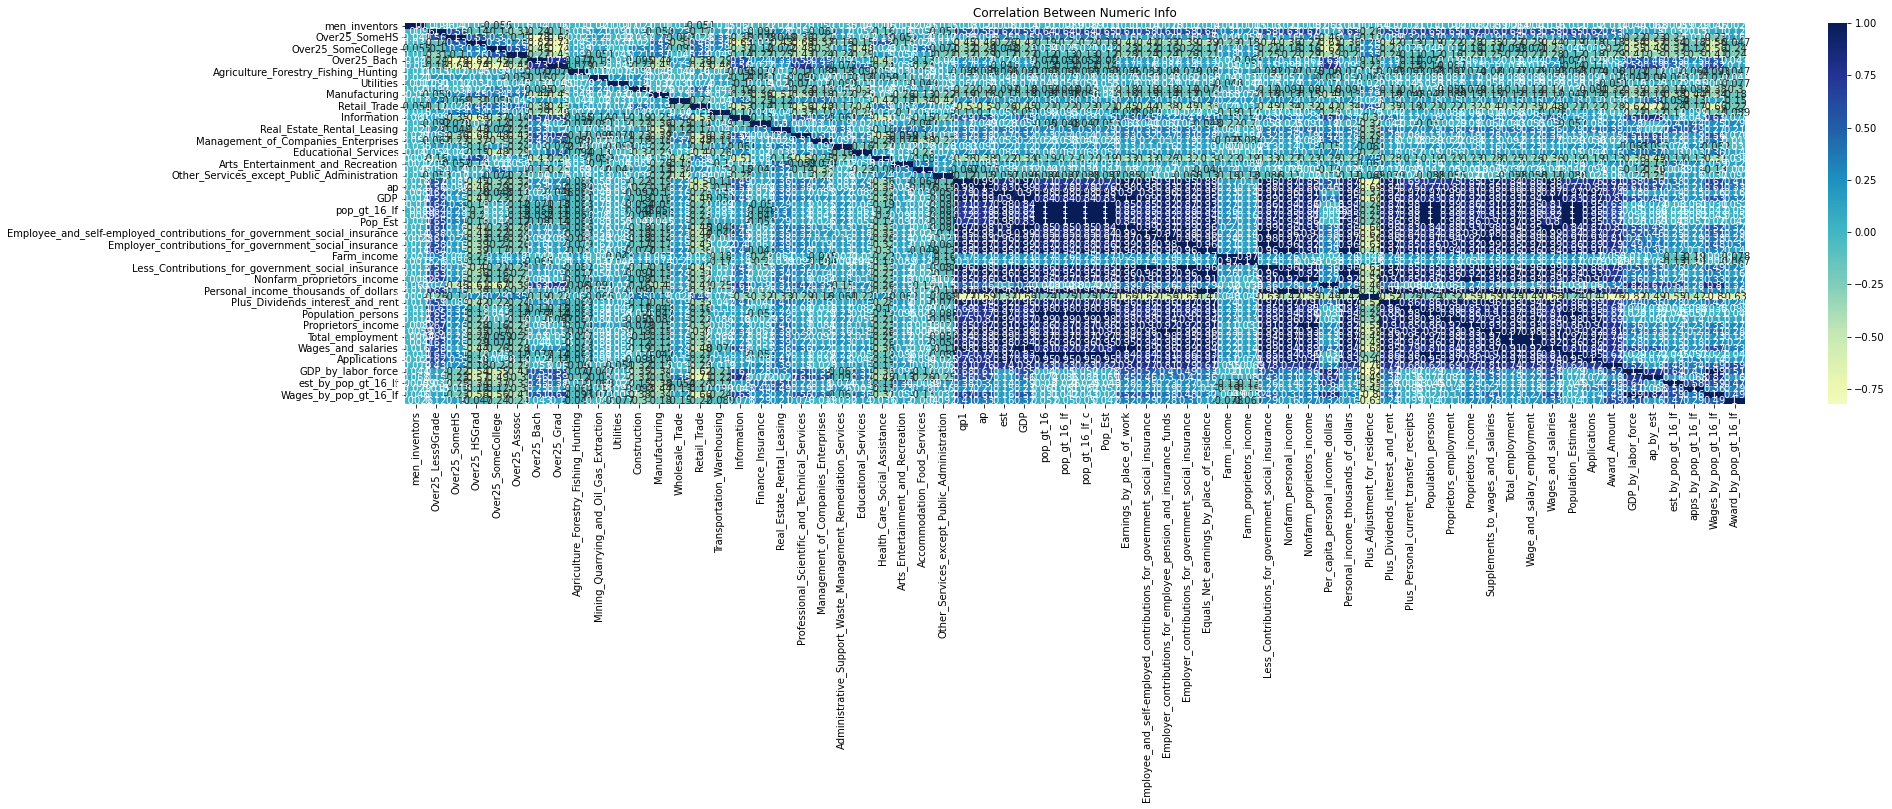

In [25]:
my_corr_all = num_vars.corr()
plt.figure(figsize = (30,7))
sns.heatmap(my_corr_all, center=0,  annot=True, cmap='YlGnBu')
plt.title("Correlation Between Numeric Info")

In [59]:
limited_numeric = [
#"team_size",
#"men_inventors",
#"women_inventors", 
#"Over25_Less9Grade",
#"Over25_SomeHS",
#"Over25_HSGrad",
#"Over25_SomeCollege",
#"Over25_Assosc",
#"Over25_Bach",
"Over25_Grad",
"Agriculture_Forestry_Fishing_Hunting",
"Mining_Quarrying_and_Oil_Gas_Extraction",
"Utilities",
"Construction",
"Manufacturing",
"Wholesale_Trade",
"Retail_Trade",
"Transportation_Warehousing",
"Information",
"Finance_Insurance",
"Real_Estate_Rental_Leasing",
"Professional_Scientific_and_Technical_Services",
"Management_of_Companies_Enterprises",
"Administrative_Support_Waste_Management_Remediation_Services",
"Educational_Services",
"Health_Care_Social_Assistance",
"Arts_Entertainment_and_Recreation",
"Accommodation_Food_Services",
"Other_Services_except_Public_Administration",
#"qp1",
#"ap",
#"est",
#"GDP",
#"pop_gt_16",
"pop_gt_16_lf",
#"pop_gt_16_lf_c",
#"Pop_Est",
#"Earnings_by_place_of_work",
#"Employee_and_self-employed_contributions_for_government_social_insurance",
#"Employer_contributions_for_employee_pension_and_insurance_funds",
#"Employer_contributions_for_government_social_insurance",
#"Equals_Net_earnings_by_place_of_residence",
"Farm_income",
#"Farm_proprietors_income",
#"Less_Contributions_for_government_social_insurance",
#"Nonfarm_personal_income",
#"Nonfarm_proprietors_income",
#"Per_capita_personal_income_dollars",
#"Personal_income_thousands_of_dollars",
#"Plus_Adjustment_for_residence",
#"Plus_Dividends_interest_and_rent",
#"Plus_Personal_current_transfer_receipts",
#"Population_persons",
#"Proprietors_employment",
#"Proprietors_income",
# "Supplements_to_wages_and_salaries",
# "Total_employment",
# "Wage_and_salary_employment",
# "Wages_and_salaries",
# "Population_Estimate",
#"Applications",
"Award_Amount",
"GDP_by_labor_force",
#"ap_by_est",
#"est_by_pop_gt_16_lf",
"apps_by_pop_gt_16_lf",
#"Wages_by_pop_gt_16_lf",
#"Award_by_pop_gt_16_lf"
]

In [27]:
#gathers the numeric columns only
#num_vars_2 = train[limited_numeric]
num_vars_2 = train_raw[limited_numeric]

#get rid of inf's and nans
#num_vars_2 = num_vars_2[~num_vars_2.isin([np.nan, np.inf, -np.inf]).any(1)]

#look at dimensions
num_vars_2.shape

(1213267, 25)

In [28]:
#empty df for vif info
vif_data_2 = pd.DataFrame()

#add columns
# feature has all the columns from the num_var df (numeric columns of train dataset)
vif_data_2["feature"] = num_vars_2.columns
# VIF column 
vif_data_2["VIF"] = [variance_inflation_factor(num_vars_2.values, i) for i in range(len(num_vars_2.columns))]
vif_data_2.sort_values(by = 'VIF', ascending = False)

,feature,VIF
7,Retail_Trade,48.088664
0,Over25_Grad,38.777581
23,GDP_by_labor_force,35.347609
16,Health_Care_Social_Assistance,24.914709
11,Real_Estate_Rental_Leasing,24.849584
14,Administrative_Support_Waste_Management_Remedi...,22.641286
18,Accommodation_Food_Services,21.190037
19,Other_Services_except_Public_Administration,19.576703
12,Professional_Scientific_and_Technical_Services,17.828955
4,Construction,16.243219


Text(0.5, 1.0, 'Correlation Between Limited Numeric Info')

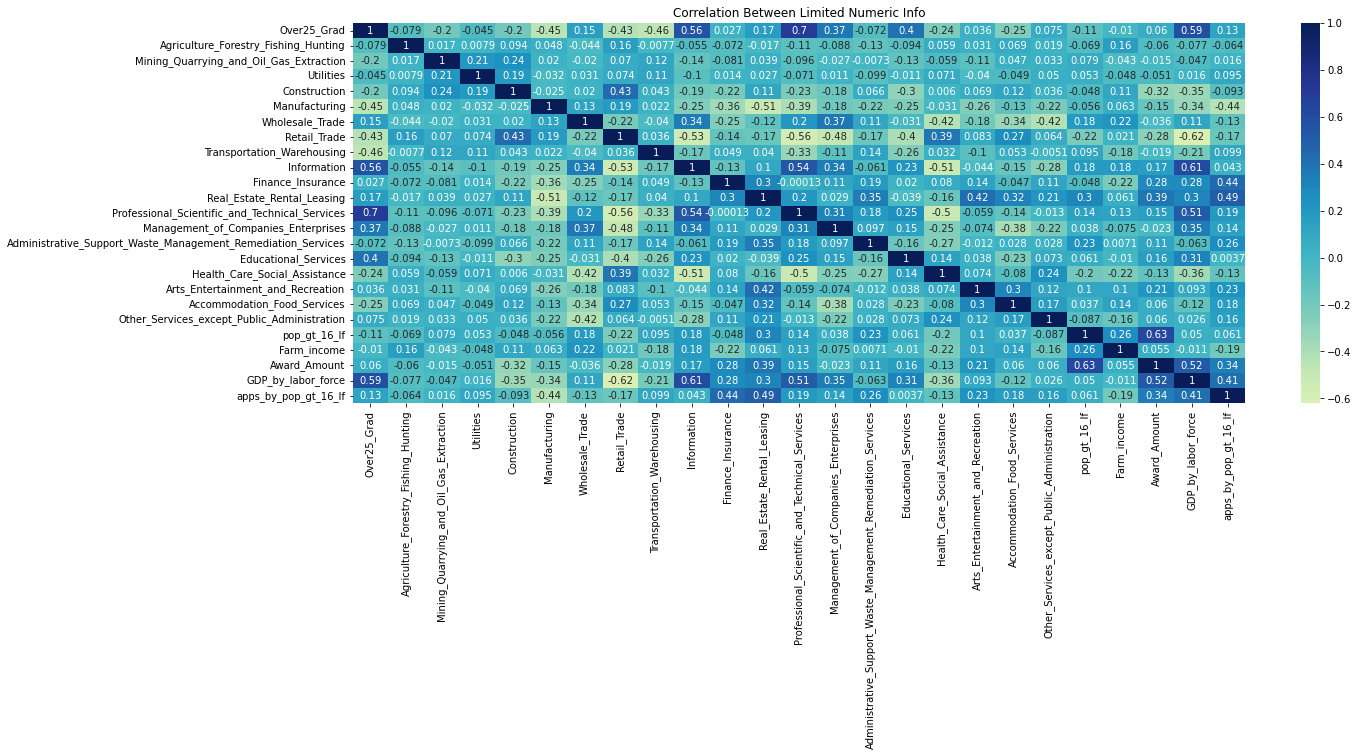

In [29]:
my_corr = num_vars_2.corr()
plt.figure(figsize = (20,7))
sns.heatmap(my_corr, center=0,  annot=True, cmap='YlGnBu')
plt.title("Correlation Between Limited Numeric Info")

## check for visual differences

In [13]:
plt.figure(figsize = (10,7))
def box_machine():
    for i in range(len(fixed_numeric)):
        sns.boxplot(x = 'women_involved', y = fixed_numeric[i], data = train_raw)
        plt.title(fixed_numeric[i])
        plt.show()

<Figure size 720x504 with 0 Axes>

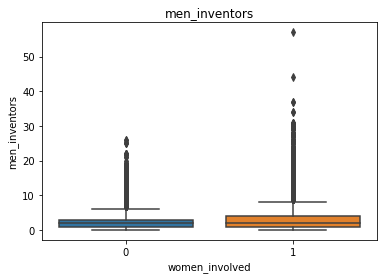

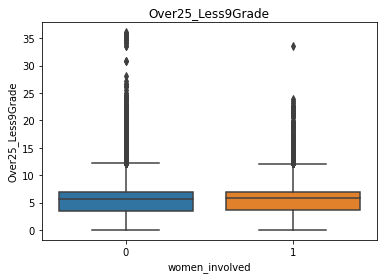

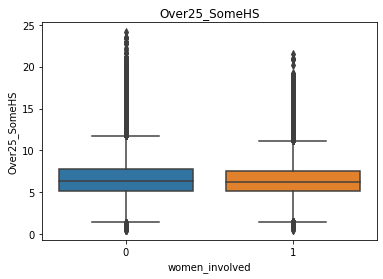

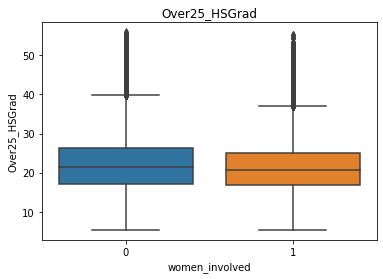

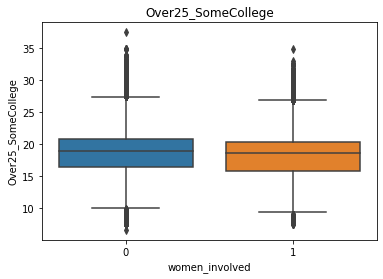

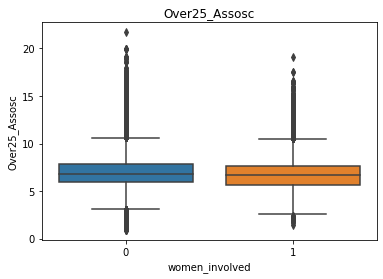

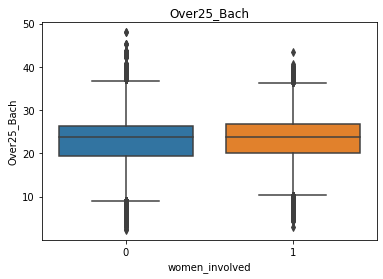

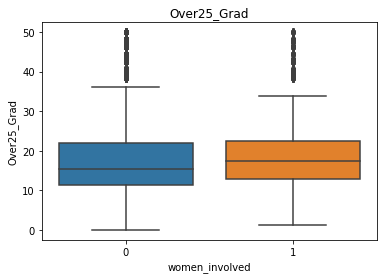

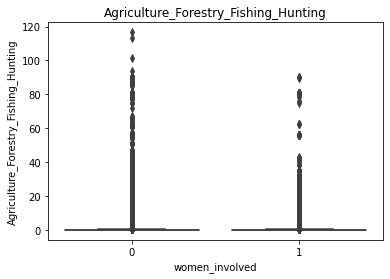

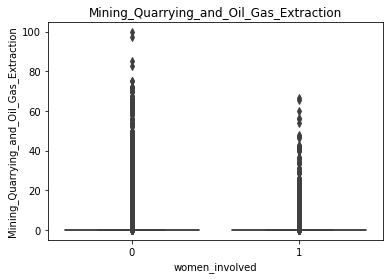

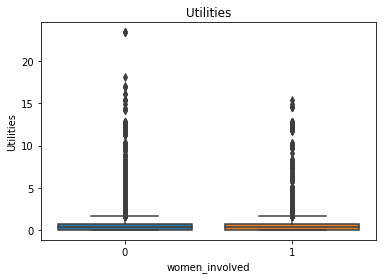

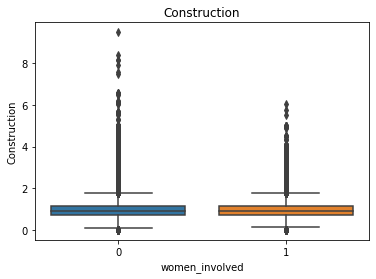

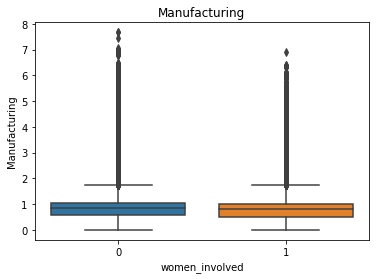

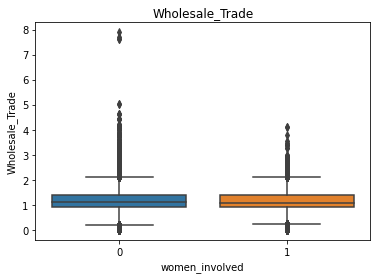

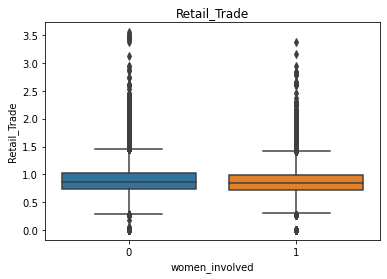

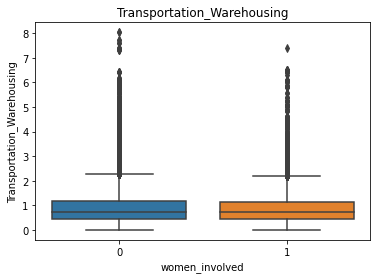

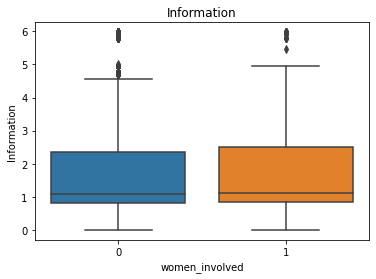

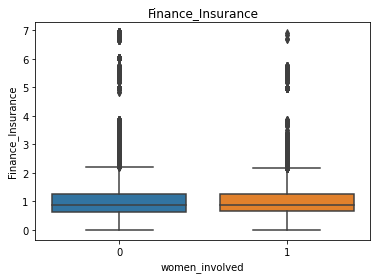

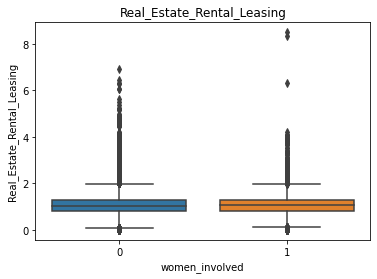

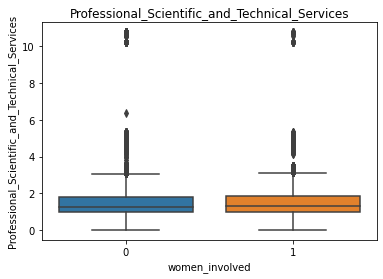

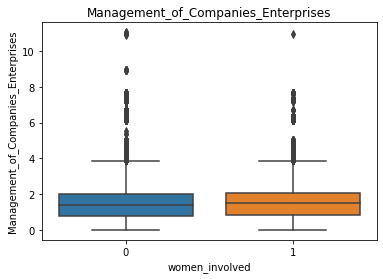

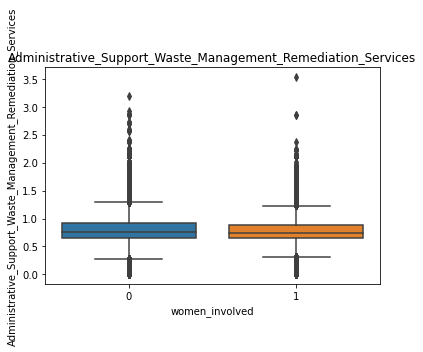

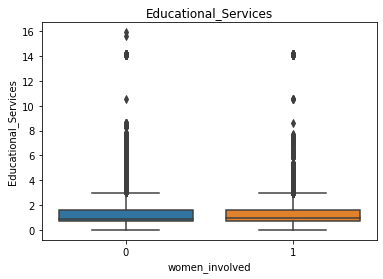

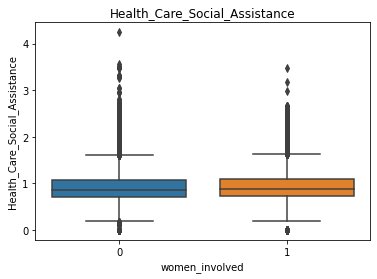

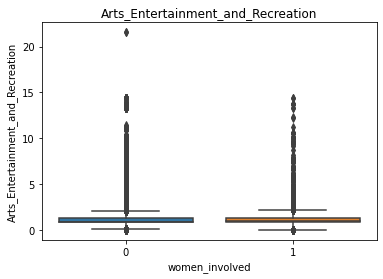

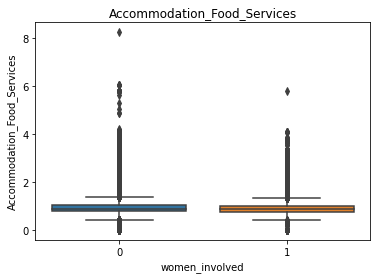

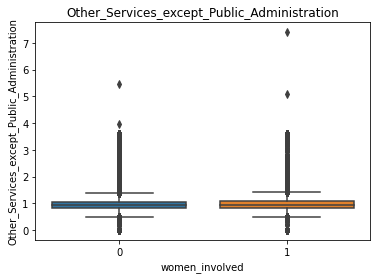

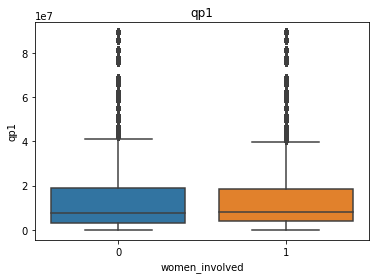

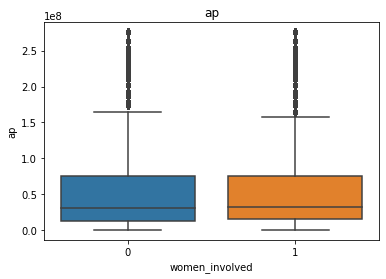

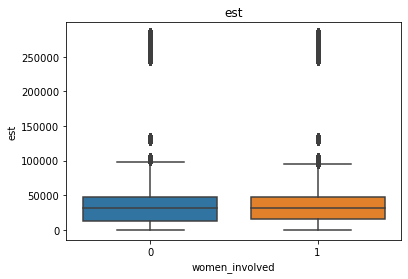

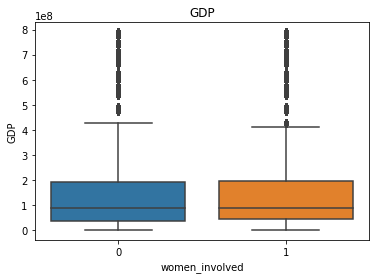

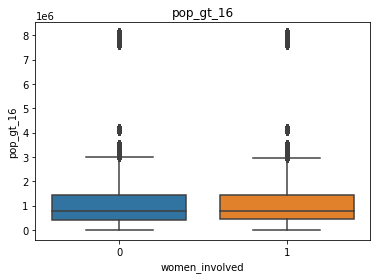

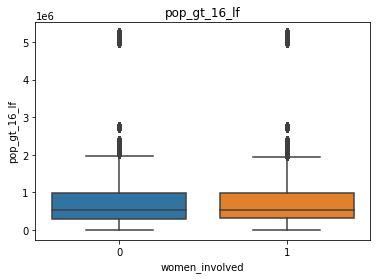

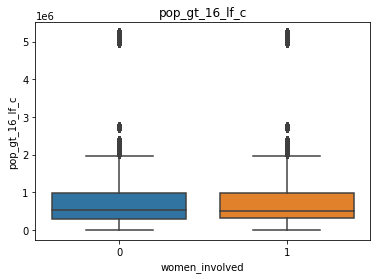

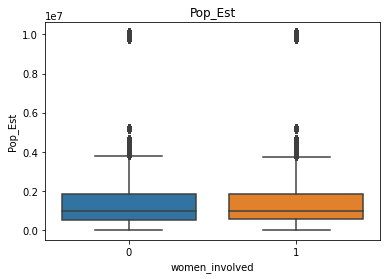

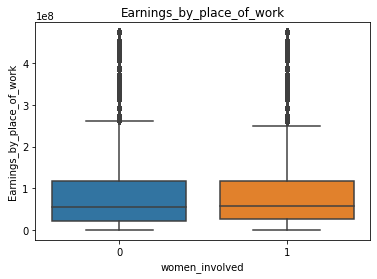

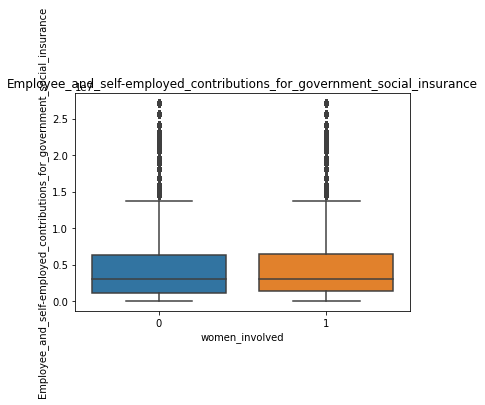

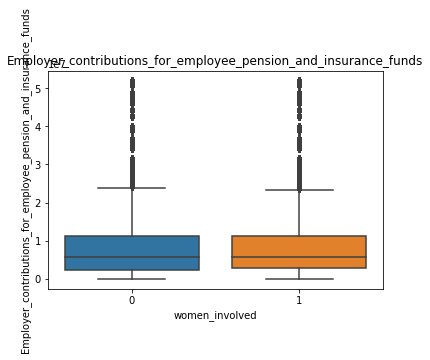

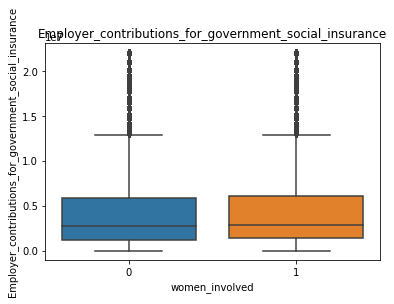

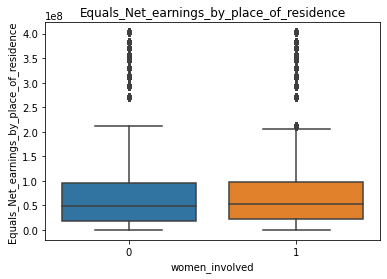

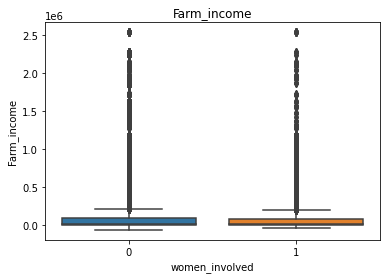

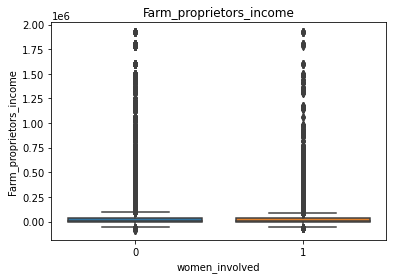

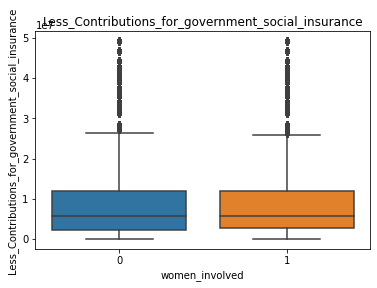

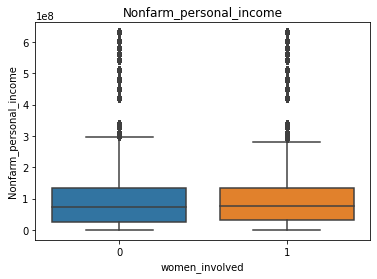

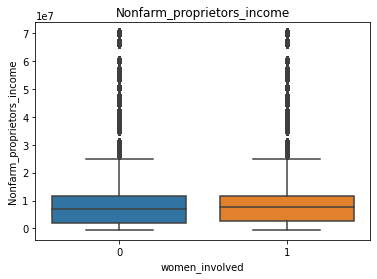

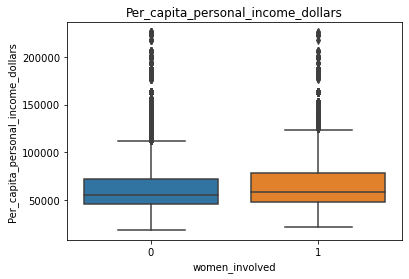

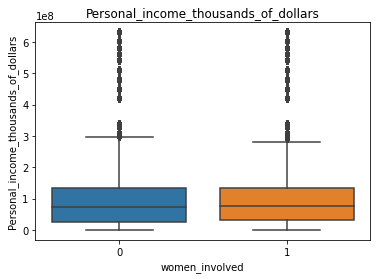

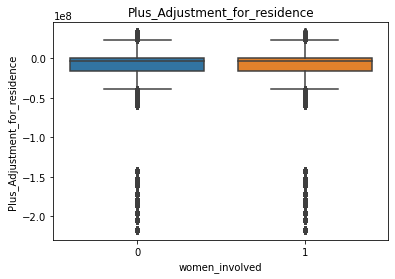

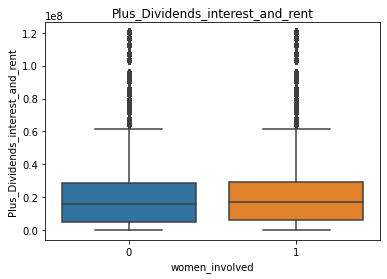

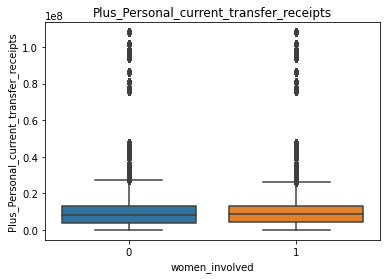

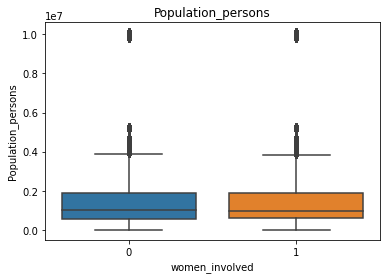

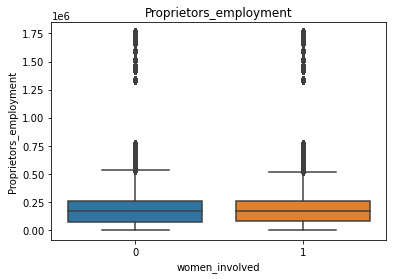

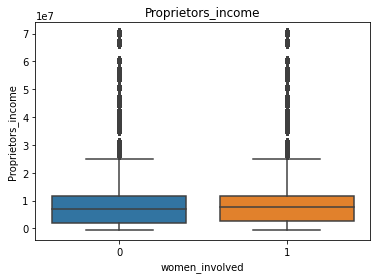

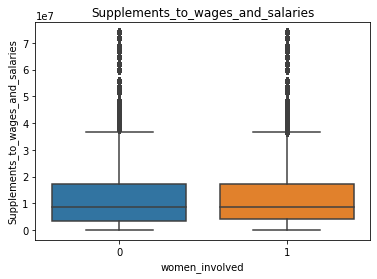

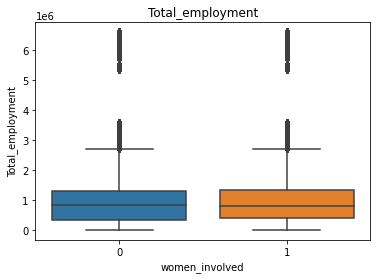

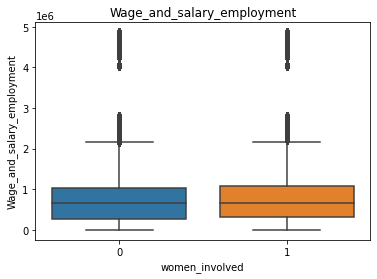

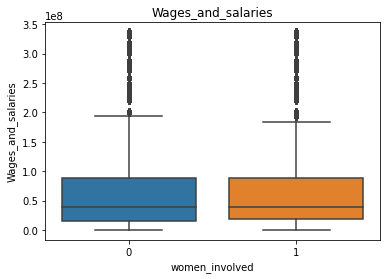

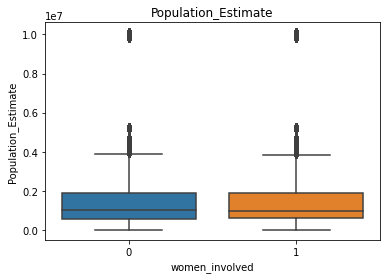

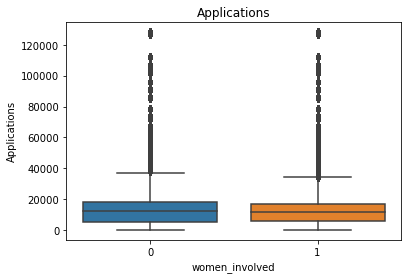

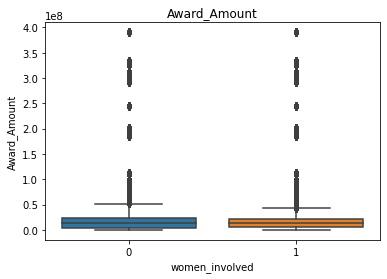

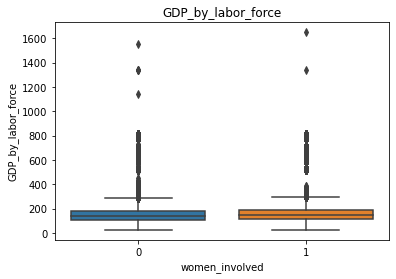

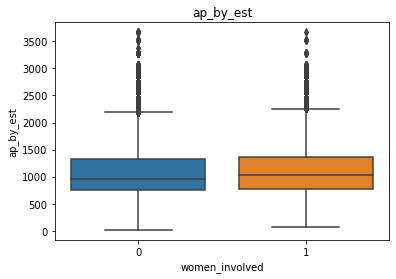

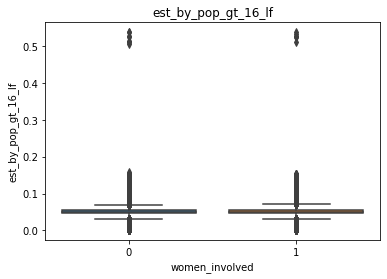

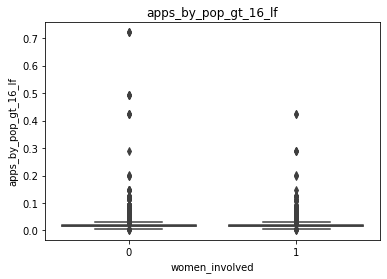

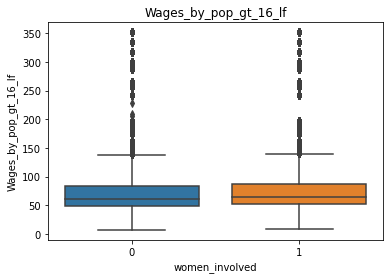

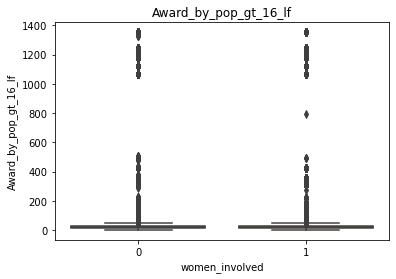

In [14]:
box_machine()

## Lasso Regression for Feature Selection -> standardized 

this is with all of the fixed numeric features -> takes a long time to run

In [60]:
### from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = LogisticRegressionCV(solver = 'liblinear', cv=2, max_iter= 2000, penalty = 'l1')
model.fit(train[fixed_numeric], train['women_involved'])


In [ ]:
df = pd.DataFrame()
df['var'] = train[numeric].columns
df['coef'] = model.coef_[0]
df.sort_values(by = 'coef', key = abs, ascending = False)

## now Lasso with only a few numerics

In [20]:
limited_numeric = [
#"team_size",
#"men_inventors",
#"women_inventors", 
#"Over25_Less9Grade",
#"Over25_SomeHS",
#"Over25_HSGrad",
#"Over25_SomeCollege",
#"Over25_Assosc",
#"Over25_Bach",
#"Over25_Grad",
"Agriculture_Forestry_Fishing_Hunting",
"Mining_Quarrying_and_Oil_Gas_Extraction",
"Utilities",
"Construction",
"Manufacturing",
"Wholesale_Trade",
"Retail_Trade",
"Transportation_Warehousing",
"Information",
"Finance_Insurance",
"Real_Estate_Rental_Leasing",
"Professional_Scientific_and_Technical_Services",
"Management_of_Companies_Enterprises",
"Administrative_Support_Waste_Management_Remediation_Services",
"Educational_Services",
"Health_Care_Social_Assistance",
"Arts_Entertainment_and_Recreation",
"Accommodation_Food_Services",
"Other_Services_except_Public_Administration",
#"qp1",
#"ap",
#"est",
#"GDP",
#"pop_gt_16",
"pop_gt_16_lf",
#"pop_gt_16_lf_c",
#"Pop_Est",
#"Earnings_by_place_of_work",
#"Employee_and_self-employed_contributions_for_government_social_insurance",
#"Employer_contributions_for_employee_pension_and_insurance_funds",
#"Employer_contributions_for_government_social_insurance",
#"Equals_Net_earnings_by_place_of_residence",
#"Farm_income",
#"Farm_proprietors_income",
#"Less_Contributions_for_government_social_insurance",
#"Nonfarm_personal_income",
#"Nonfarm_proprietors_income",
"Per_capita_personal_income_dollars",
#"Personal_income_thousands_of_dollars",
#"Plus_Adjustment_for_residence",
#"Plus_Dividends_interest_and_rent",
#"Plus_Personal_current_transfer_receipts",
#"Population_persons",
#"Proprietors_employment",
#"Proprietors_income",
# "Supplements_to_wages_and_salaries",
# "Total_employment",
# "Wage_and_salary_employment",
# "Wages_and_salaries",
# "Population_Estimate",
#"Applications",
"Award_Amount",
#"GDP_by_labor_force",
#"ap_by_est",
#"est_by_pop_gt_16_lf",
"apps_by_pop_gt_16_lf",
#"Wages_by_pop_gt_16_lf",
#"Award_by_pop_gt_16_lf"
]

Text(0.5, 1.0, 'Correlation Between Limited Numeric Info')

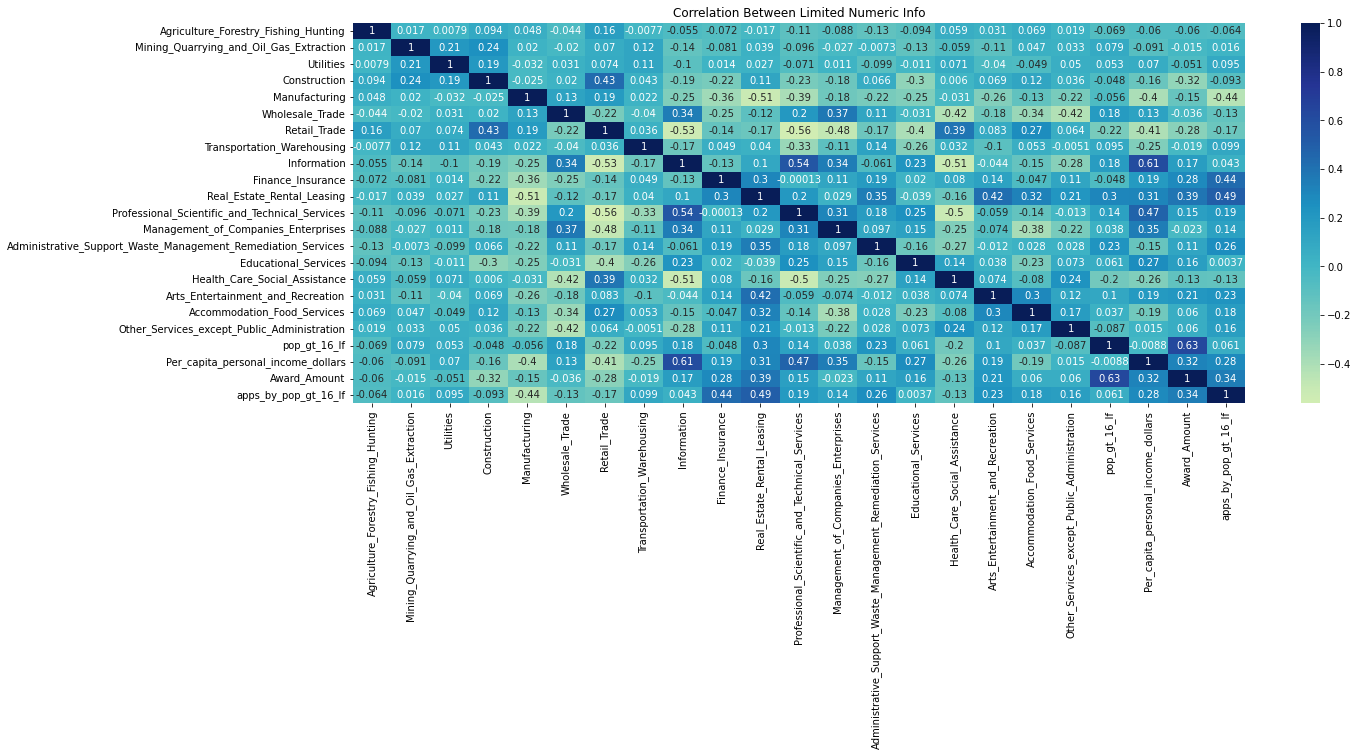

In [21]:
my_corr = train[limited_numeric].corr()
plt.figure(figsize = (20,7))
sns.heatmap(my_corr, center=0,  annot=True, cmap='YlGnBu')
plt.title("Correlation Between Limited Numeric Info")

In [22]:
# now with the limited variables 
#model_limited = LogisticRegression(solver='liblinear', random_state=0, penalty = 'l1')
#with cv
model_limited = LogisticRegressionCV(solver = 'liblinear', max_iter=2000, cv=5, penalty = 'l1')


#now fit
model_limited.fit(train[limited_numeric], train['women_involved'])

LogisticRegressionCV(cv=5, max_iter=2000, penalty='l1', solver='liblinear')

In [23]:
df_limited = pd.DataFrame()
df_limited['var'] = train[limited_numeric].columns
df_limited['coef'] = model_limited.coef_[0]
df_limited.sort_values(by = 'coef', key = abs, ascending = False)

# per_capita_personal_income_dollars, Manufacturing, Educational_Services, Accommodation_Food_Services, Health_Care_Social_Assistance, Retail_Trade

,var,coef
20,Per_capita_personal_income_dollars,0.064411
4,Manufacturing,-0.049402
14,Educational_Services,0.039354
17,Accommodation_Food_Services,-0.017728
15,Health_Care_Social_Assistance,0.013103
6,Retail_Trade,-0.003856
1,Mining_Quarrying_and_Oil_Gas_Extraction,-0.002507
0,Agriculture_Forestry_Fishing_Hunting,0.000000
13,Administrative_Support_Waste_Management_Remedi...,0.000000
21,Award_Amount,0.000000


## try it with categoricals and the non zero limited variables 


In [114]:
limited_numeric = [
#"team_size",
#"men_inventors",
#"women_inventors", 
#"Over25_Less9Grade",
#"Over25_SomeHS",
#"Over25_HSGrad",
#"Over25_SomeCollege",
#"Over25_Assosc",
#"Over25_Bach",
#"Over25_Grad",
#"Agriculture_Forestry_Fishing_Hunting",
#"Mining_Quarrying_and_Oil_Gas_Extraction",
#"Utilities",
#"Construction",
"Manufacturing",
#"Wholesale_Trade",
#"Retail_Trade",
#"Transportation_Warehousing",
"Information",
# "Finance_Insurance",
# "Real_Estate_Rental_Leasing",
"Professional_Scientific_and_Technical_Services",
# "Management_of_Companies_Enterprises",
# "Administrative_Support_Waste_Management_Remediation_Services",
"Educational_Services",
"Health_Care_Social_Assistance",
# "Arts_Entertainment_and_Recreation",
"Accommodation_Food_Services",
# "Other_Services_except_Public_Administration",
#"qp1",
#"ap",
#"est",
#"GDP",
#"pop_gt_16",
#"pop_gt_16_lf",
#"pop_gt_16_lf_c",
#"Pop_Est",
#"Earnings_by_place_of_work",
#"Employee_and_self-employed_contributions_for_government_social_insurance",
#"Employer_contributions_for_employee_pension_and_insurance_funds",
#"Employer_contributions_for_government_social_insurance",
#"Equals_Net_earnings_by_place_of_residence",
#"Farm_income",
#"Farm_proprietors_income",
#"Less_Contributions_for_government_social_insurance",
#"Nonfarm_personal_income",
#"Nonfarm_proprietors_income",
#"Per_capita_personal_income_dollars",   #multicolinearity with information
#"Personal_income_thousands_of_dollars",
#"Plus_Adjustment_for_residence",
#"Plus_Dividends_interest_and_rent",
#"Plus_Personal_current_transfer_receipts",
#"Population_persons",
#"Proprietors_employment",
#"Proprietors_income",
# "Supplements_to_wages_and_salaries",
# "Total_employment",
# "Wage_and_salary_employment",
# "Wages_and_salaries",
# "Population_Estimate",
#"Applications",
#"Award_Amount",
#"GDP_by_labor_force",
#"ap_by_est",
#"est_by_pop_gt_16_lf",
#"apps_by_pop_gt_16_lf",
#"Wages_by_pop_gt_16_lf",
#"Award_by_pop_gt_16_lf"
]

In [112]:
fixed_cat = [
# "women_involved",
#"bea_region",  
# "Agriculture_Forestry_Fishing_Hunting_base",
# "Mining_Quarrying_and_Oil_Gas_Extraction_base",
# "Utilities_base",
# "Construction_base",
# "Manufacturing_base",
# "Wholesale_Trade_base",
# "Retail_Trade_base",
# "Transportation_Warehousing_base",
# "Information_base",
# "Finance_Insurance_base",
# "Real_Estate_Rental_Leasing_base",
# "Professional_Scientific_and_Technical_Services_base",
# "Management_of_Companies_Enterprises_base",
# "Administrative_Support_Waste_Management_Remediation_Services_base",
# "Educational_Services_base",
# "Health_Care_Social_Assistance_base",
# "Arts_Entertainment_and_Recreation_base",
# "Accommodation_Food_Services_base",
# "Other_Services_except_Public_Administration_base",
# "r1_involved",
# "r2_involved",
# "special_focus_involved",
"any_R_uni_involved"
]

In [115]:
#gathers the numeric columns only
num_vars_3 = train_raw[limited_numeric]

#look at dimensions
#num_vars_2.shape

#empty df for vif info
vif_data_3 = pd.DataFrame()

#add columns
# feature has all the columns from the num_var df (numeric columns of train dataset)
vif_data_3["feature"] = num_vars_3.columns
# VIF column 
vif_data_3["VIF"] = [variance_inflation_factor(num_vars_3.values, i) for i in range(len(num_vars_3.columns))]
vif_data_3.sort_values(by = 'VIF', ascending = False)

,feature,VIF
4,Health_Care_Social_Assistance,9.927199
5,Accommodation_Food_Services,9.163475
2,Professional_Scientific_and_Technical_Services,7.375690
1,Information,4.446819
3,Educational_Services,4.002426
0,Manufacturing,3.083056


Text(0.5, 1.0, 'Correlation Between Limited Numeric Info')

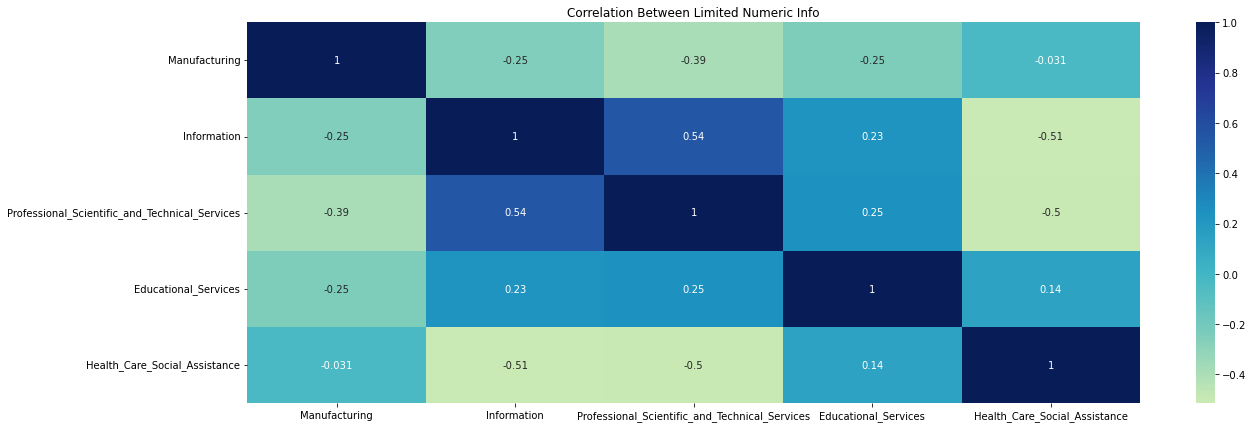

In [102]:
my_corr = train_raw[limited_numeric].corr()
plt.figure(figsize = (20,7))
sns.heatmap(my_corr, center=0,  annot=True, cmap='YlGnBu')
plt.title("Correlation Between Limited Numeric Info")

In [107]:
train_limited_encoded = pd.concat([train[fixed_cat], train[limited_numeric]], axis = 1) #, pd.get_dummies(train.bea_region)], axis = 1)


In [108]:
# now with the limited variables 
model_limited_cat = LogisticRegression(solver='liblinear', fit_intercept = True, random_state=0, penalty = 'l1')

#now fit
model_limited_cat.fit(train_limited_encoded, train['women_involved'])

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [109]:
df3_limited_cat = pd.DataFrame()
df3_limited_cat['var'] = train_limited_encoded.columns
df3_limited_cat['coef'] = model_limited_cat.coef_[0]
df3_limited_cat.sort_values(by = 'coef',key = abs,  ascending = False)
#any R very high

,var,coef
0,any_R_uni_involved,0.791943
1,Manufacturing,-0.095345
5,Health_Care_Social_Assistance,0.070871
2,Information,0.061474
4,Educational_Services,0.052323
3,Professional_Scientific_and_Technical_Services,0.028492


In [110]:
import statsmodels.api as sm
logit_model=sm.Logit(train['women_involved'],train_limited_encoded)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.690306
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         women_involved   No. Observations:              1213267
Model:                          Logit   Df Residuals:                  1213261
Method:                           MLE   Df Model:                            5
Date:                Fri, 25 Nov 2022   Pseudo R-squ.:                 -0.2541
Time:                        13:12:22   Log-Likelihood:            -8.3753e+05
converged:                       True   LL-Null:                   -6.6785e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
any_R_uni_involved                  

In [33]:
# helps me with the confusion matrix
def con_matrix_expanded(ground_truth, preds):
    tn, fp, fn, tp = confusion_matrix(ground_truth, preds).ravel()
    print("False_Pos_Rate = ", round(fp/(tn+fp), 2))
    print("False_Neg_Rate = ", round(fn/(fn+tp), 2))
    print("True_Pos_Rate = ", round(tp/(fn+tp), 2))
    print("True_Neg_Rate = ", round(tn/(tn+fp), 2))
    print("Accuracy =  " , round((tp + tn)/(tn + fp + fn + tp), 3))



#recall is sensitivity or True positive rate
#specificity is the true negative rate
#Precision (PREC) is calculated as the number of correct positive predictions 
#divided by the total number of positive predictions. It is also called positive 
#predictive value (PPV). The best precision is 1.0, whereas the worst is 0.0.

In [75]:
test_limited_encoded = pd.concat([test[fixed_cat], test[limited_numeric], pd.get_dummies(test.bea_region)], axis = 1)


In [80]:
y_pred4 = (model_limited_cat.predict_proba(test_limited_encoded)[:,1] >= 0.225).astype(bool) # set threshold as 0.2

In [81]:
#y_pred4 = model_limited3_cat.predict(val_limited3_encoded)
print(confusion_matrix(test['women_involved'], y_pred4))

#tn, fp, fn, tp = confusion_matrix(validation_data['women_involved'], y_pred4).ravel()
#print(tn, fp, fn, tp)
con_matrix_expanded(test['women_involved'], y_pred4) 

print(classification_report(test['women_involved'], y_pred4))

[[43357 59170]
 [10098 22183]]
False_Pos_Rate =  0.58
False_Neg_Rate =  0.31
True_Pos_Rate =  0.69
True_Neg_Rate =  0.42
Accuracy =   0.486
              precision    recall  f1-score   support

           0       0.81      0.42      0.56    102527
           1       0.27      0.69      0.39     32281

    accuracy                           0.49    134808
   macro avg       0.54      0.56      0.47    134808
weighted avg       0.68      0.49      0.52    134808



## now fit for real on the raw data

In [84]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [87]:
#train_raw_limited = pd.concat([train_raw[fixed_cat], train_raw[limited_numeric]], axis = 1 )
#test_raw_limited = pd.concat([test_raw[fixed_cat], test_raw[limited_numeric]], axis = 1 )

train_raw_limited = pd.concat([train_raw[fixed_cat], train_raw[limited_numeric], pd.get_dummies(train_raw.bea_region)], axis = 1)
test_raw_limited = pd.concat([test_raw[fixed_cat], test_raw[limited_numeric], pd.get_dummies(test_raw.bea_region)], axis = 1)

In [88]:
raw_model = LogisticRegression(solver="liblinear", random_state=0, fit_intercept = True).fit(train_raw_limited , train_raw['women_involved'])


In [89]:
roc_auc_score(train_raw['women_involved'], raw_model.predict_proba(train_raw_limited)[:, 1])
roc_auc_score(train_raw['women_involved'], raw_model.decision_function(train_raw_limited))


0.4972427712150667

In [90]:
roc_auc_score(test_raw['women_involved'], raw_model.predict_proba(test_raw_limited)[:, 1])
roc_auc_score(test_raw['women_involved'], raw_model.decision_function(test_raw_limited))


0.49430522719018405

In [119]:
len(train.query("any_R_uni_involved == 1 & women_involved == 1"))

21825

In [117]:
len(train)

1213267

In [118]:
53203/1213267

0.04385102372354972

In [120]:
21825/53203

0.41022122812623346